In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [47]:
#У меня не получилось нормально загрузить данные по ссылке, даже при использовании параметра names и разделителя, 
#данные в таблице были перекошены между столбцами. Поэтому я взяла исходный датасет с
# https://www.kaggle.com/c/boston-dataset/data

In [22]:
housing=pd.read_csv('boston_data.csv')
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


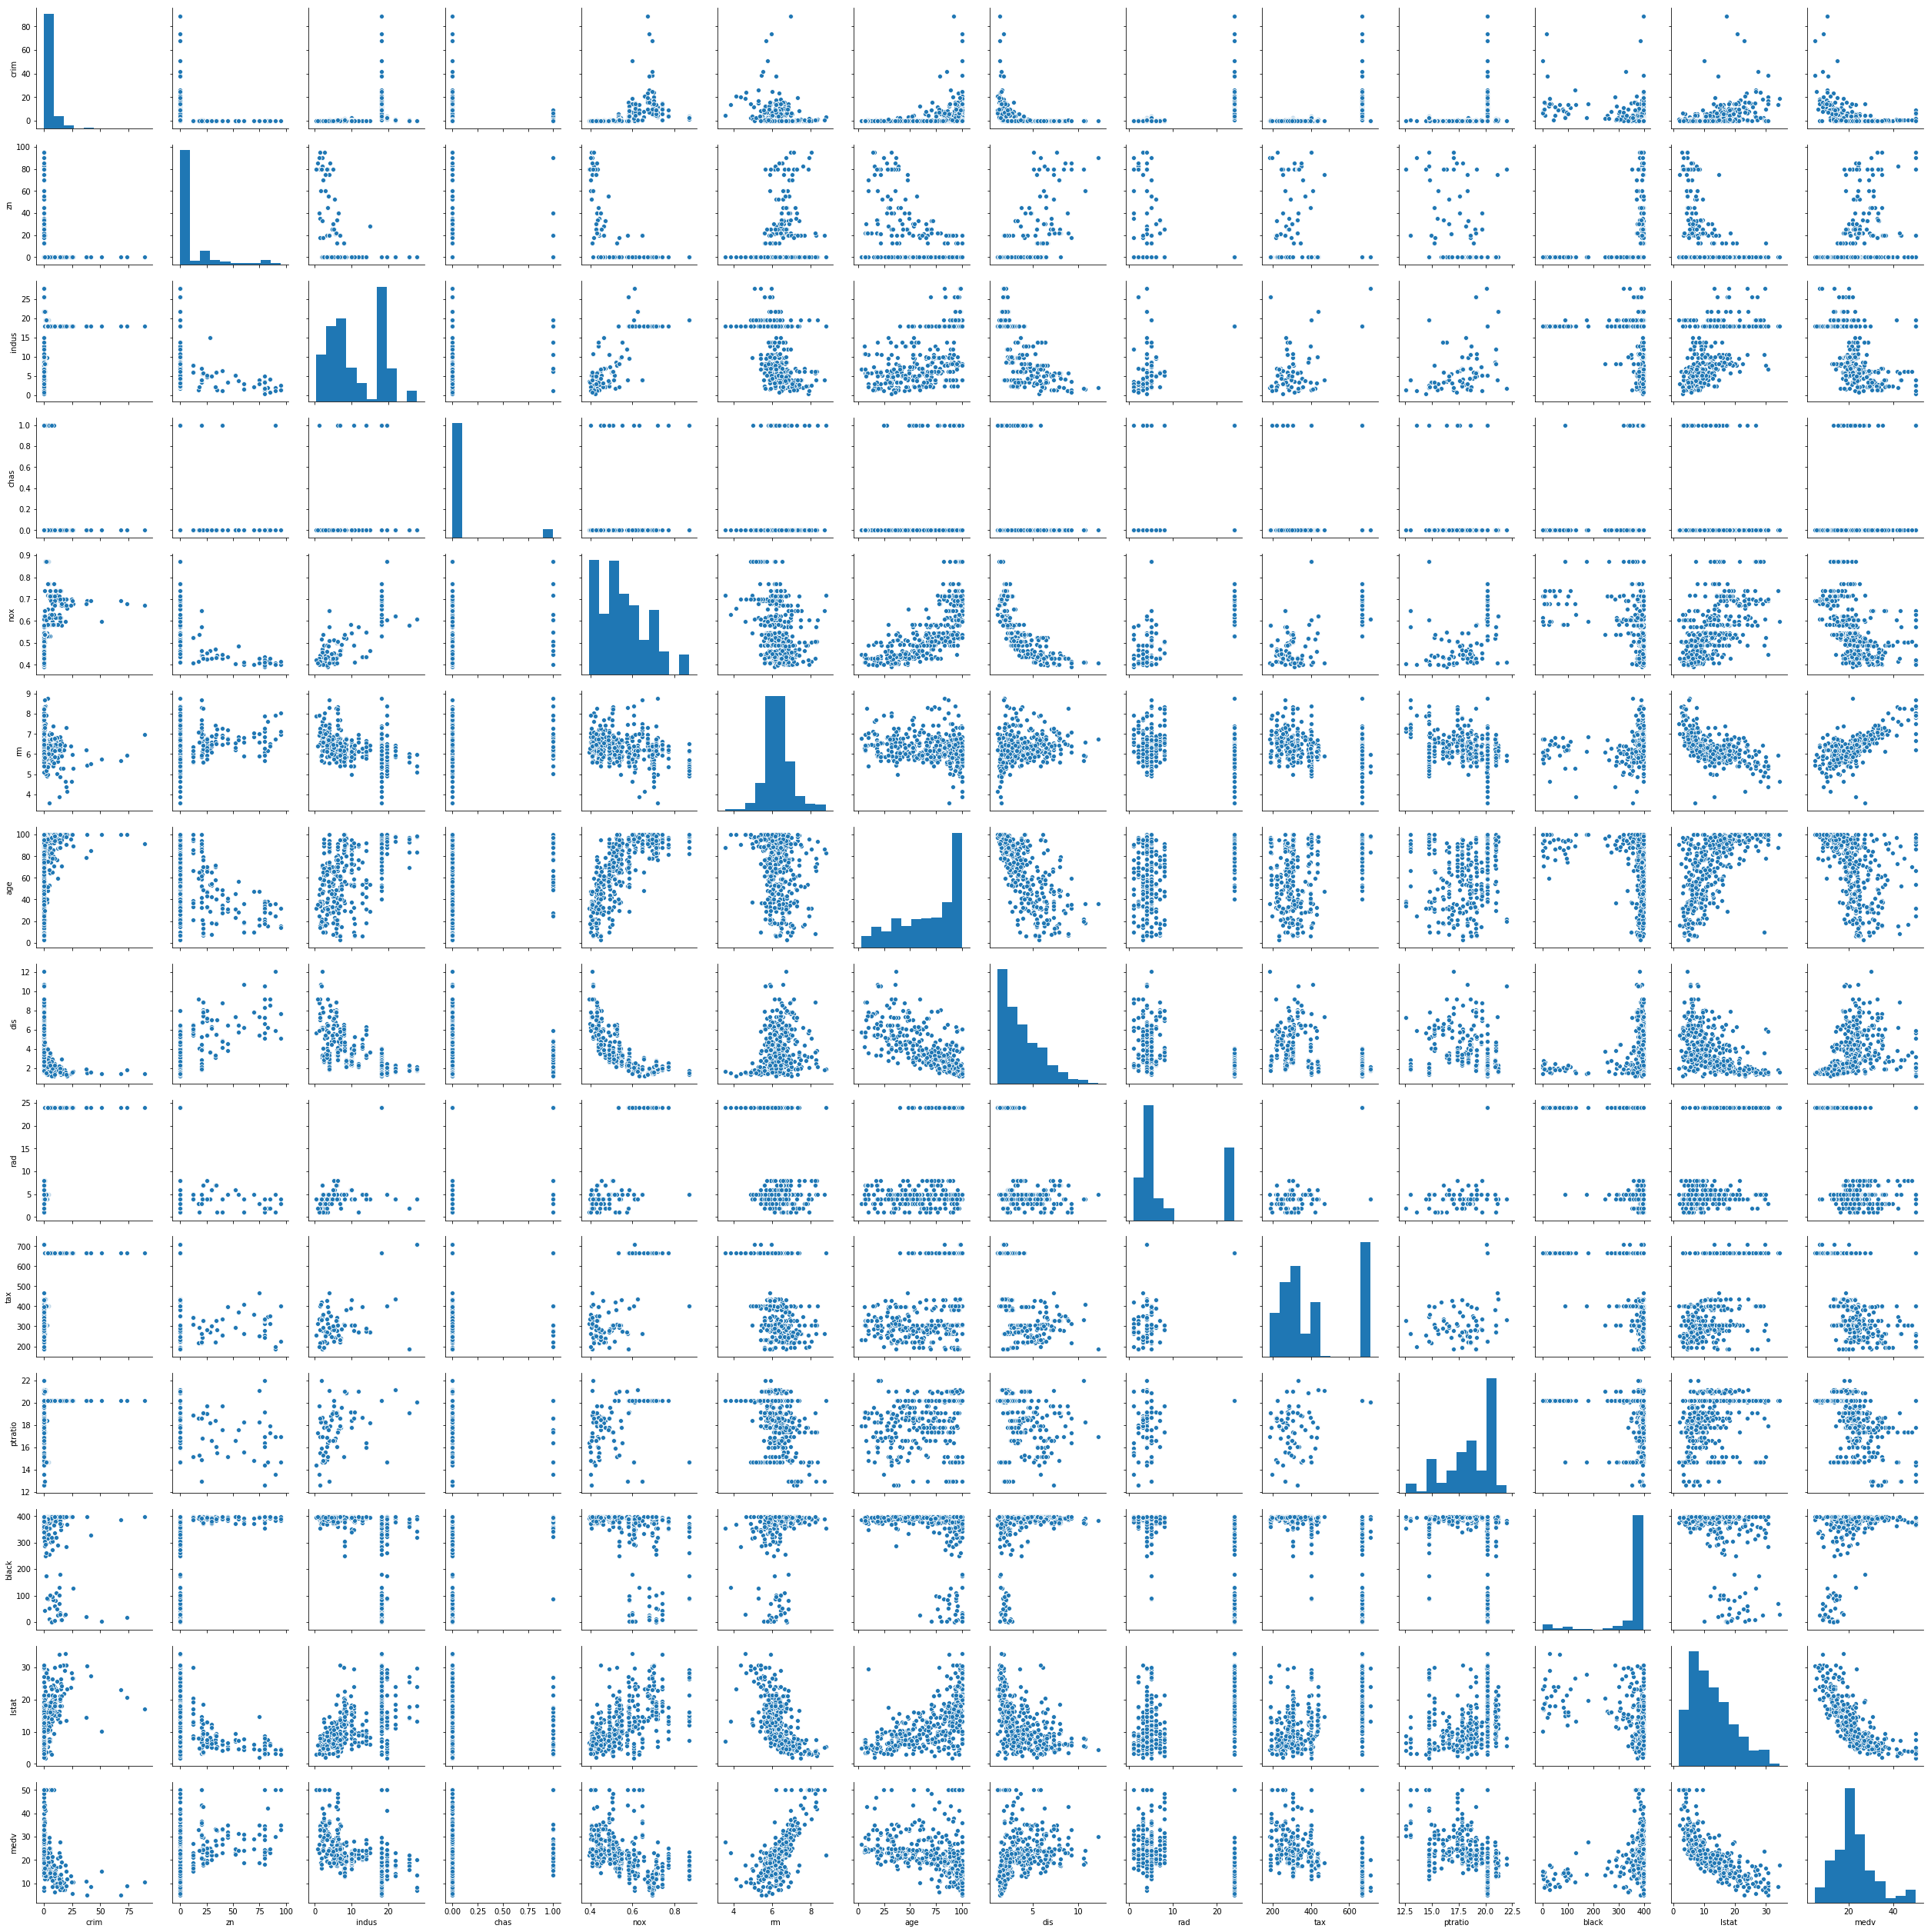

In [23]:
sns.pairplot(housing)

In [24]:
#На нормальное распределение более менее похоже распределение по RM, может еще MEDV (хотя там есть хвост).
#На равномерное распределение из получившихся ничего не похоже.
#Биноминального тут скорее всего нет, так как оно относится к распределение количества «успехов» 
#в последовательности из независимых случайных экспериментов.
#На Бернулли похоже распределение по значению CHAS. Так как CHAS принимает всего значения - 0 и 1.
#На геометрическое очень похоже по значению DIS, CRIM.
#На лонгнормальное похоже ISTAT, 

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa


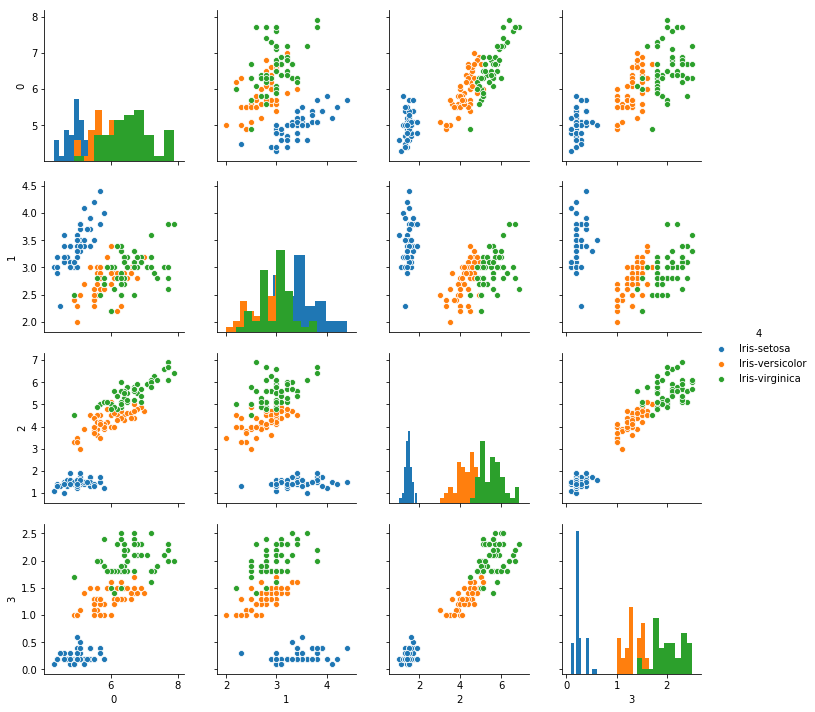

In [34]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
print(data[0:4])
fig = sns.pairplot(data=data, 
                   hue=4, diag_kind = 'hist')

plt.show()

In [32]:
#Вот тут я не очень поняла вопрос:
#"Какие вектора из полученных метрик хорошо отделяют заданные выборки (можно провести прямую так, что два класса станут разными)"
#Но на всех скаттерплотах можно провести линию между выборкой iris_virginica и всеми остальными. Видимо iris_virginica 
#значительно отличается от стальных видов.

In [35]:
cov1 = cov2 = np.array([[2, -1], [-1, 2]] )
m1 = np.array([-0.1, 1])
m2 = np.array([0.7, 0])
N = 200

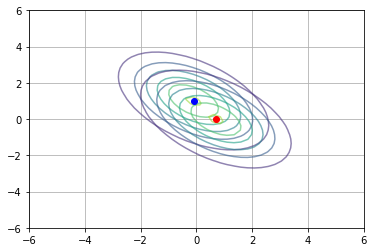

In [37]:
from scipy.stats import multivariate_normal as mvn
nGrid = 50
x1, y1 = np.meshgrid(np.linspace(-6,6,nGrid),np.linspace(-6,6,nGrid))
s1 = np.column_stack([x1.flat, y1.flat])

x2, y2 = np.meshgrid(np.linspace(-6,6,nGrid),np.linspace(-6,6,nGrid))
s2 = np.column_stack([x2.flat, y2.flat])

plt.plot(m1[0], m1[1], 'bo')
plt.plot(m2[0], m2[1], 'ro')
plt.grid()
# Графики
z1 = mvn.pdf(s1, m1, cov1).reshape(x1.shape)
z2 = mvn.pdf(s2, m2, cov2).reshape(x2.shape)
# контуры 
plt.contour(x1, y1, z1, 6, alpha=0.6)
plt.contour(x2, y2, z2, 6, alpha=0.6)

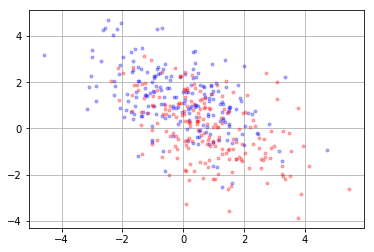

In [39]:

data1 = np.column_stack(np.random.multivariate_normal(m1, cov1, N))
data2 = np.column_stack(np.random.multivariate_normal(m2, cov2, N))

scatter1 = plt.plot(data1[0], data1[1], 'b.', alpha=0.3)
scatter2 = plt.plot(data2[0], data2[1], 'r.', alpha=0.3)
plt.grid()

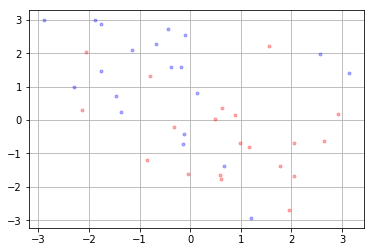

In [41]:
N1 = 20
data1_ = np.column_stack(np.random.multivariate_normal(m1, cov1, N1))
data2_ = np.column_stack(np.random.multivariate_normal(m2, cov2, N1))

scatter1 = plt.plot(data1_[0], data1_[1], 'b.', alpha=0.3)
scatter2 = plt.plot(data2_[0], data2_[1], 'r.', alpha=0.3)
plt.grid()

In [46]:
#Первое распределение было похоже на нормальное, по второму нельзя так на глаз определить распределение, так как значение 
#выборок меньше в 10 раз. Эти данные можно отнести к распределению Стьюдента, потому что исходные выборки имели нормальное
#распределение и исподьзовались предыдущие матрицы ковариации, которые были одинаковые для 2х выборок.
#плюс в выборках всего по 20 значений. Этого мало для нормального распределения.

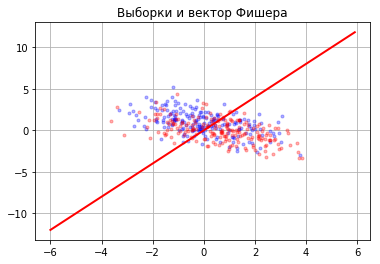

In [44]:
from numpy.linalg import inv as inv
data1 = np.column_stack(np.random.multivariate_normal(m1, cov1, N))
data2 = np.column_stack(np.random.multivariate_normal(m2, cov2, N))

scatter1 = plt.plot(data1[0], data1[1], 'b.', alpha=0.3)
scatter2 = plt.plot(data2[0], data2[1], 'r.', alpha=0.3)
wF = inv(cov1 + cov2).dot(m1.T-m2.T)
xx = np.arange(-6,6,0.1)
yy = -xx.dot(wF[1]/wF[0])
fisher_line = plt.plot(xx, yy, 'r', linewidth=2)
plt.title("Выборки и вектор Фишера")
plt.grid()

In [45]:
#Такое направление у вектора позволит максимально отделить средние значения выборок и сделать проекцию разбросов минимальной.